# Question 4.31

## Problem Statement

As a valve is opened, water flows through the diffuser shown in Fig. P4.31 at an increasing flow rate so that the velocity along the centerline is given by $ \mathbf{V} = \it{u}\mathbf{\hat{i}} = V_0(1 - \rm{e}^{-ct})(1 - \it{x/l})\mathbf{\hat{i}} $, where $\it{u}$, $ \it{c} $, and $ \it{l} $ are constants. Determine the acceleration as a function of $ \it{x} $ and $ \it{t} $. If $ V_0 = 10 ft/s $ and $ \it{l} = 5 $, what value of $ \it{c} $ (other than $ \it{c} = 0 $) is needed to make the acceleration 0 for any $ \it{x} $ at $ \it{t} = 1s $? Explain how the acceleration can be zero if the flow rate is increasing with time?

Be sure to leave specify all assumptions and comment on the functionality of the code. 

![Fig P4.31](./fig_p4_31.png)


Two solution paths are presented below. The first assumes that the student finds the acceleration equation by hand and then use Python to numerically solve for c. The second solves the entire question using Python.

## Solution Path 1

In [1]:
from numpy import exp, linspace
from scipy.optimize import fsolve

from matplotlib import pyplot as plt

To use the fsolve function, you need to have an initial guess at the value. We will start by declaring a function that represents the portion of the acceleration that needs to equal zero.

In [2]:
def acceleration(c):
    v = 10 # ft/s
    l = 5 # ft
    t = 1 # s
    return c * exp(-c * t) - (v / l) * (1 - exp(-c * t))**2

Now, with the equation, we can graph it and see where it crosses 0 to get a rough estimate of the value.

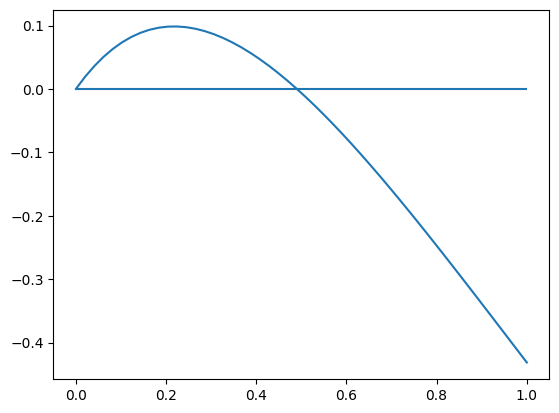

In [3]:
x = linspace(0, 1)

plt.hlines(0, 0, 1)
plt.plot(x, acceleration(x))

Inspecting the graph shows an estimate value of 0.5. With that guess in hand, we can use fsolve to find the value.

In [4]:
c = fsolve(acceleration, 0.5)
print(f"c = {c[0]:.4f} 1/s")

c = 0.4901 1/s


## Solution Path 2

In [5]:
from sympy import symbols, lambdify, diff, exp
from scipy.optimize import fsolve
from matplotlib import pyplot as plt

After importing the necessary libraries, we can set up the symbols that represent the constants and variables used in the equation. After that, create an equation for the velocity and use the `diff` function to get the acceleration equation.

In [6]:
c, x, t, l, v = symbols("c x t l v")

vel = v*(1 - exp(-c * t))*(1 - x/l)
accel = diff(vel, t) + vel * diff(vel, x)

After getting the acceleration equation, we can substitute in the known values and then lambdify the equation, so we can use a numerical solver on it. Since the x-value does not matter for this equation, we can put in any value we want. We will opt for 1.

In [7]:
accel = accel.subs({x: 1, t: 1, l: 5, v: 10})
acceleration = lambdify([c], accel, "scipy")

At this point, the solution path converges with the first solution path, so the code will be copied below.

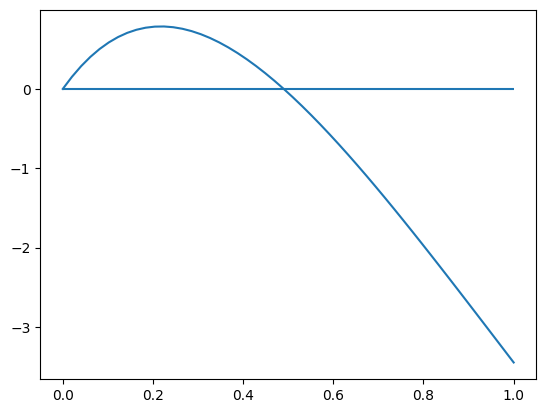

In [8]:
x = linspace(0, 1)

plt.hlines(0, 0, 1)
plt.plot(x, acceleration(x))

In [9]:
c = fsolve(acceleration, 0.5)
print(f"c = {c[0]:.4f} 1/s")

c = 0.4901 1/s
